## Análise de dados (pandas)
#### O objetivo da análise de dados é organizar sua  base de dados, organizando as tabelas disponiveis excluindo linhas vazias, campos irrelevantes etc, para depois começar a avaliar os dados através de gráficos e/ou machine learning.

In [36]:
import pandas as pd
# r (raw_string) na frente do caminho pra indicar uma URL e separador = ";"
df = pd.read_csv(r"C:\Users\devda\Desktop\Jupyter\Analise de dados + Machine learning\Analise de dados (arquivos)\Contoso - Vendas - 2017.csv",sep = ";")
df


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


## Resumo de uma tabela (.info())
#### Importante para saber os tipos de dados (type) para caso haja necessidade converte-los

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980642 entries, 0 to 980641
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Numero da Venda       980642 non-null  int64 
 1   Data da Venda         980642 non-null  object
 2   Data do Envio         980642 non-null  object
 3   ID Canal              980642 non-null  int64 
 4   ID Loja               980642 non-null  int64 
 5   ID Produto            980642 non-null  int64 
 6   ID Promocao           980642 non-null  int64 
 7   ID Cliente            980642 non-null  int64 
 8   Quantidade Vendida    980642 non-null  int64 
 9   Quantidade Devolvida  980642 non-null  int64 
dtypes: int64(8), object(2)
memory usage: 74.8+ MB


## Separando colunas do df de acordo com sua relação a ser analisada
#### Queremos saber qual produto mais vendido e qual produto mais devolvido, entao vamos isolar as colunas Id produto, Qnt vendida e qnt devolvida:

In [42]:
df_vendas_devolucoes = ["ID Produto", "Quantidade Vendida", "Quantidade Devolvida"]
df_vd = df[df_vendas_devolucoes]
df_vd
# isolamos as 3 colunas mais relevantes para a análise




,ID Produto,Quantidade Vendida,Quantidade Devolvida
0,981,9,1
1,1586,9,1
2,1444,13,1
3,1468,6,1
4,1106,4,1
...,...,...,...
980637,2490,120,0
980638,2488,120,0
980639,2511,80,0
980640,436,39,0


In [44]:
mais_vendido = max(df_vd["Quantidade Vendida"])
mais_devolv = max(df_vd["Quantidade Devolvida"])
print(f"O produto mais vendido foi {mais_vendido} unds e mais devolvido {mais_devolv} unds")


O produto mais vendido foi 1200 unds e mais devolvido 5 unds


### Pegando o index ou valor de uma linha (.loc[...])
#### Vamos pegar a linha do produto mais vendido e o mais devolvido

In [46]:
print(df_vd.loc[df_vd["Quantidade Vendida"] == mais_vendido])
print(df_vd.loc[df_vd["Quantidade Devolvida"] == mais_devolv])

        ID Produto  Quantidade Vendida  Quantidade Devolvida
850074        2517                1200                     0
        ID Produto  Quantidade Vendida  Quantidade Devolvida
949135         939                  30                     5


## Integrandro 2 ou mais dataframes distintos
#### Agora vamos pegar df separados porém correlacionados para tratar os dados e eliminar colunas ou linhas desnecessárias, para fazer a análise mais detalhada.

OBS: ter cuidado com a codificação na hora de importar os dados, ou poderá cair num erro de encoding, para resolver isso precisamos informar o tipo de encoder passando os parametros:
encoding='utf-8', encoding='cp1252', encoding='latin1' ou encoding='ISO-8859-1'

In [69]:
df_vendas = pd.read_csv(r"C:\Users\devda\Desktop\Jupyter\Analise de dados + Machine learning\Analise de dados (arquivos)\Contoso - Vendas - 2017.csv",sep = ";")
df_produtos = pd.read_csv(r"C:\Users\devda\Desktop\Jupyter\Analise de dados + Machine learning\Analise de dados (arquivos)\Contoso - Cadastro Produtos.csv",sep = ";")
df_lojas = pd.read_csv(r"C:\Users\devda\Desktop\Jupyter\Analise de dados + Machine learning\Analise de dados (arquivos)\Contoso - Lojas.csv",sep = ";")
df_clientes = pd.read_csv(r"C:\Users\devda\Desktop\Jupyter\Analise de dados + Machine learning\Analise de dados (arquivos)\Contoso - Clientes.csv",sep = ";")

display(df_vendas)
display(df_produtos)
display(df_lojas)
display(df_clientes)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1
1,2,01/01/2017,06/01/2017,5,308,1586,2,18469,9,1
2,3,01/01/2017,01/01/2017,0,294,1444,5,19730,13,1
3,4,01/01/2017,01/01/2017,0,251,1468,5,29326,6,1
4,5,01/01/2017,07/01/2017,6,94,1106,2,22617,4,1
...,...,...,...,...,...,...,...,...,...,...
980637,980638,31/12/2017,31/12/2017,0,194,2490,4,10353,120,0
980638,980639,31/12/2017,06/01/2018,6,32,2488,4,31750,120,0
980639,980640,31/12/2017,03/01/2018,3,210,2511,10,12003,80,0
980640,980641,31/12/2017,31/12/2017,0,53,436,4,25550,39,0


,Nome da Marca,Tipo,Custo Unitario,Preco Unitario,ID Produto,Categoria
0,Contoso,Econômico,"10,69","20,96",873,Acessório para Computador
1,Contoso,Econômico,"6,63",13,879,Acessório para Computador
2,Contoso,Econômico,"6,63",13,880,Acessório para Computador
3,Contoso,Econômico,"6,63",13,881,Acessório para Computador
4,Contoso,Econômico,"6,63",13,882,Acessório para Computador
...,...,...,...,...,...,...
1685,Southridge Video,Regular,"82,77","179,99",1602,Filme DVD
1686,Southridge Video,Regular,"73,57","159,99",1606,Filme DVD
1687,Southridge Video,Regular,"82,77","179,99",1607,Filme DVD
1688,Southridge Video,Regular,"73,57","159,99",1611,Filme DVD


,ID Loja,Nome da Loja,Quantidade Colaboradores,País
0,1,Loja Contoso Seattle No.1,17.0,Estados Unidos
1,2,Loja Contoso Seattle No.2,25.0,Estados Unidos
2,3,Loja Contoso Kennewick,26.0,Estados Unidos
3,4,Loja Contoso Bellevue,19.0,Estados Unidos
4,5,Loja Contoso Redmond,33.0,Estados Unidos
...,...,...,...,...
301,306,Loja Contoso Europe Online,7.0,Alemanha
302,307,Loja Contoso Asia Online,8.0,China
303,308,Loja Contoso North America Reseller,15.0,Estados Unidos
304,309,Loja Contoso Europe Reseller,12.0,França


,ID Cliente,Primeiro Nome,Sobrenome,E-mail,Genero,Numero de Filhos,Data de Nascimento,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1,Garnet,Lanfranchi,glanfranchi0@mayoclinic.com,Feminino,2,12/05/1995,NaN,NaN,NaN,NaN
1,2,Lurette,Roseblade,lroseblade1@bigcartel.com,Feminino,2,30/06/1943,NaN,NaN,NaN,NaN
2,3,Glenden,Ishchenko,gishchenko2@moonfruit.com,Masculino,5,09/04/1989,NaN,NaN,NaN,NaN
3,4,Baron,Jedrzejewsky,bjedrzejewsky3@e-recht24.de,Masculino,4,17/11/1998,NaN,NaN,NaN,NaN
4,5,Sheree,Bredbury,sbredbury4@sitemeter.com,Feminino,5,08/09/1975,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
39499,39500,Brandy,Malhotra,brandy0@adventure-works.com,Masculino,3,27/07/1980,NaN,NaN,NaN,NaN
39500,39501,Alicia,Raje,alicia12@adventure-works.com,Feminino,5,10/05/2001,NaN,NaN,NaN,NaN
39501,39502,Connie,Rai,connie4@adventure-works.com,Feminino,0,13/02/1997,NaN,NaN,NaN,NaN
39502,39503,Shawn,Raji,shawn23@adventure-works.com,Masculino,1,29/03/2001,NaN,NaN,NaN,NaN


## Removendo colunas desnecessárias .drop()
#### Usaremos o drop passando uma lista de colunas para excluir.
atenção devemos informar ao drop o que queremos remover, axis=0 para linhas ou axis=1 para colunas.


In [59]:
#df_clientes = df_clientes.drop(["Unnamed: 7", "Unnamed: 8", "Unnamed: 9", "Unnamed: 10"], axis=1)
#display(df_clientes)




## Ou podemos tbm ao invés de excluir, podemos somente redefinir o que queremos:

In [70]:
df_clientes = df_clientes[["ID Cliente", "E-mail"]]
df_produtos = df_produtos[["ID Produto", "Categoria"]]
df_lojas = df_lojas[["ID Loja", "Nome da Loja"]]

#display(df_clientes)#mostrar apenas um para ver como ficou
#display(df_produtos)
#display(df_lojas)

## Juntando bases de dados em um único DF .merge()
#### O merge() precisa que todas tabelas a juntar possua uma coluna com mesmo nome para funcionar. Se não tiver temos que alterar com .rename

new_df = df1.merge(df2, on="coluna") ** onde coluna = nome da coluna comum as 2 DF

In [71]:
#juntando o s dataframes
df_vendas = df_vendas.merge(df_produtos, on='ID Produto')
df_vendas = df_vendas.merge(df_lojas, on='ID Loja')
df_vendas = df_vendas.merge(df_clientes, on='ID Cliente')

#exibindo o DF final

#display(df_vendas.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp


## Alterando o nome de uma coluna .rename
df = df.rename(columns={'nome_antigo': 'novo_nome'})

In [74]:
df_vendas = df_vendas.rename(columns={'E-mail': 'E-mail Cliente'})
display(df_vendas.head())

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail Cliente
0,1,01/01/2017,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp


## Agora que estamos com as tabelas "enxutas" vamos usar nossos dados para responder algum perguntas:
#### Qual o cliente comprou mais vezes?
- pra isso vamos usar o método .value_counts(), para contar qnts x um valor se repete
- Vamos plotar um gráfico usando método .plot()
OBS: podemos usar plot() do pandas ou importar o matplotlib para gráficos mais detalhados.


karen33@adventure-works.com       77
chloe77@adventure-works.com       74
julia43@adventure-works.com       69
destiny66@adventure-works.com     68
gilbert9@adventure-works.com      68
                                  ..
isabella51@adventure-works.com     1
wdalescoci@pbs.org                 1
kbroggelliin@rakuten.co.jp         1
connor15@adventure-works.com       1
ekorneevmm@instagram.com           1
Name: E-mail Cliente, Length: 38907, dtype: int64

<AxesSubplot:>

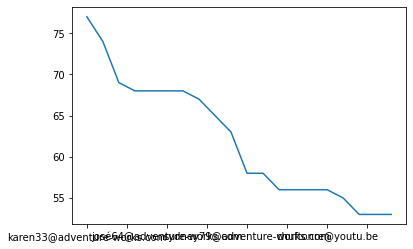

In [82]:
# Sabendo que, cada vez que aparece um email_cliente na tabela foi uma compra
# que ele fez, então vamos ver a frequencia com que cada cliente compra na loja
frequencia_compras = df_vendas['E-mail Cliente'].value_counts()
display(frequencia_compras)
# vamos plotar no grafico os primeiros 20 clientes
frequencia_compras[:20].plot()




#### Qual loja mais vendeu?
- Vamos pegar as vendas de todas as lojas, algumas lojas podem aparecer mais de uma vez na lista, então vamos agrupar os valores de forma que cada loja so apareca uma vez e seus valores sejam somados.
- Para isso vamos usar o groupby
- para somar usaremos o .sum()

OBS: .sum()=somar, mean()=media, max()=maior, min()=minimo etc....

In [101]:
vendas_cada_loja = df_vendas.groupby('Nome da Loja').sum()[['Quantidade Vendida']]
#display(vendas_cada_loja)



### Agora vamos ordenar do maior para o menor para saber qual mais vendeu sort_values() 
df = df.sort_values('nome da coluna a ordenar')
obs: ascending=False == ordem decrescente

,Quantidade Vendida
Nome da Loja,
Loja Contoso Catalog,1029117
Loja Contoso North America Online,701961
Loja Contoso Europe Online,616845
Loja Contoso Asia Online,578458
Loja Contoso North America Reseller,520176
...,...
Loja Contoso Berlin,379
Loja Contoso Paterson,371
Loja Contoso Marseille,370


<AxesSubplot:xlabel='Nome da Loja'>

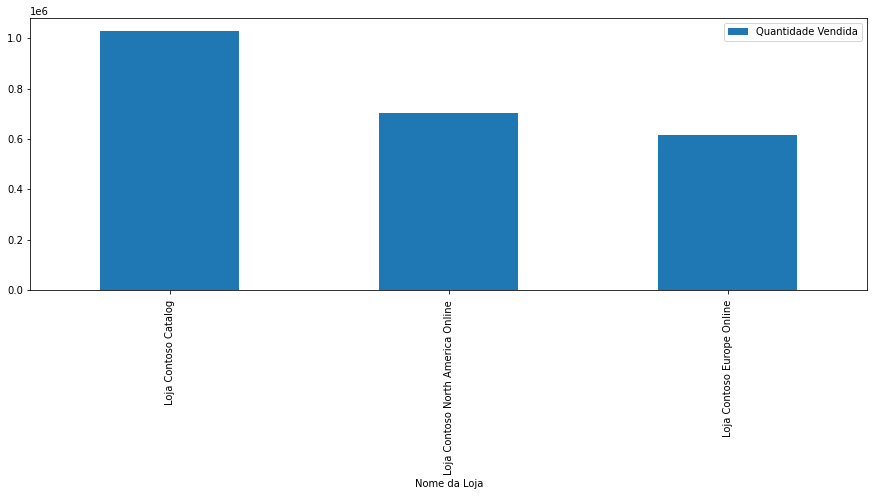

In [104]:
vendas_cada_loja = vendas_cada_loja.sort_values('Quantidade Vendida', ascending=False)
display(vendas_cada_loja)
vendas_cada_loja[:5].plot(figsize=(15,5),kind="bar") # plotar as 5 lojas que mais venderam

## Vamos extrair da tabela o nome da loja e o valor das suas vendas
- vamos usar o max() pra pegar o maior valor
- vamos usar o idxmax() pra pegar o index do maior valor

In [109]:
# loja que mais vendeu
maior_valor = vendas_cada_loja["Quantidade Vendida"].max()
melhor_loja = vendas_cada_loja["Quantidade Vendida"].idxmax()
print(f"A melhor loja foi {melhor_loja} com {maior_valor} em vendas")
# Loja que menos vendeu
menor_valor = vendas_cada_loja["Quantidade Vendida"].min()
pior_loja = vendas_cada_loja["Quantidade Vendida"].idxmin()
print(f"A pior loja foi {pior_loja} com {menor_valor} em vendas")

A melhor loja foi Loja Contoso Catalog  com 1029117 em vendas
A pior loja foi Loja Contoso Venezia  com 234 em vendas


## Qual foi a porcentagem de vendas devolvidas?
- % Vendas devolvidas = devoluções/vendas

In [129]:
qnt_vendida = df_vendas["Quantidade Vendida"].sum()
qnt_devolvida = df_vendas['Quantidade Devolvida'].sum()

print('A porcentagem global de devolução foi: {:.2%}'.format(qnt_devolvida/qnt_vendida))

A procentagem global de devolução foi: 1.17%


## Qual foi a porcentagem de devoluções da loja contoso europe online?

In [121]:
# Pegando a tabela com somente id da loja = 306 (europe online)
lj_europeol = df_vendas[df_vendas["ID Loja"] == 306]
vendas = lj_europeol["Quantidade Vendida"].sum()
devolucoes = lj_europeol['Quantidade Devolvida'].sum()

print('A loja Contoso europe online teve {:.2%} de devolução.'.format(devolucoes/vendas))


A loja Contoso europe online teve 1.33% de devolução.


## Quais as vendas da loja contoso europe online que não tiveram devoluções?

In [128]:
# a tabela loja ja estava filtrada, filtramos somente qnt devolvida = 0...
lj_europeol = df_vendas[df_vendas["Quantidade Devolvida"] == 0]
display(lj_europeol[:4]) #[:4]mostra so as 4 primeiras linhas

# mas tbm podemos fazer numa tabela geral filtrando as 2 informações de uma vez...
vendas_sem_dev = df_vendas[(df_vendas["ID Loja"] == 306) & (df_vendas["Quantidade Devolvida"] == 0)]
display(vendas_sem_dev[:4])

# nas duas formas temos o mesmo resultado:

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
2,191019,20/03/2017,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp
3,18610,08/01/2017,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp
4,287704,23/04/2017,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp


,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail Cliente
1,880458,23/11/2017,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp
17,614980,18/08/2017,18/08/2017,0,306,1621,9,21344,4,0,Filme DVD,Loja Contoso Europe Online,makayla3@adventure-works.com
18,786402,21/10/2017,25/10/2017,4,306,226,10,21344,8,0,Home Theater,Loja Contoso Europe Online,makayla3@adventure-works.com
19,383897,25/05/2017,28/05/2017,3,306,347,1,21344,20,0,Laptop,Loja Contoso Europe Online,makayla3@adventure-works.com


# Modificando tabelas
- Note que a coluna de datas é um object, não esta reconhecido como uma data em si, então vamos modificar usando to_datetime()

df[nomedacoluna] = pd.to_datetime(df[nomedacoluna], format='%d/%m/%Y')

OBS: no format='%d/%m/%Y' temos que informar pro pandas qual formato esta na tabela

df_vendas.info() #note que data é um object e nao um datetime
df_vendas['Data da Venda'] = pd.to_datetime(df_vendas['Data da Venda'], format='%d/%m/%Y')
df_vendas.info() # agora transformamos numa data válida

## E se quisermos criar colunas somente para o dia, o mes e o ano separadamente?
- Agora que esta formatado como data podemos "brincar" com ela

In [136]:
# as colunas ano, mes e dia nao existe, o pandas vai criar pra gente:
df_vendas["Ano da venda"] = df_vendas["Data da Venda"].dt.year
df_vendas["Mes da venda"] = df_vendas["Data da Venda"].dt.month
df_vendas["Dia da venda"] = df_vendas["Data da Venda"].dt.day
display(df_vendas.head())

# Agora podemos fazer análise de quanto vendeu em janeiro de 2017 (por exemplo)

,Numero da Venda,Data da Venda,Data do Envio,ID Canal,ID Loja,ID Produto,ID Promocao,ID Cliente,Quantidade Vendida,Quantidade Devolvida,Categoria,Nome da Loja,E-mail Cliente,Ano da venda,Mes da venda,Dia da venda
0,1,2017-01-01,02/01/2017,1,86,981,2,6825,9,1,Câmera Digital,Loja Contoso Austin,rbrumfieldmy@ameblo.jp,2017,1,1
1,880458,2017-11-23,23/11/2017,0,306,235,10,6825,8,0,Home Theater,Loja Contoso Europe Online,rbrumfieldmy@ameblo.jp,2017,11,23
2,191019,2017-03-20,21/03/2017,1,172,376,2,6825,9,0,Laptop,Loja Contoso Hartford,rbrumfieldmy@ameblo.jp,2017,3,20
3,18610,2017-01-08,10/01/2017,2,200,448,2,6825,48,0,Desktop,Loja Contoso Catalog,rbrumfieldmy@ameblo.jp,2017,1,8
4,287704,2017-04-23,26/04/2017,3,76,280,1,6825,10,0,Home Theater,Loja Contoso Beaumont No.1,rbrumfieldmy@ameblo.jp,2017,4,23


## Modificando um valor específico num DF
- LOC - localiza um item de acordo com index e coluna
- ILOC - 